Defining the Environment and Initialization

In [1]:
import numpy as np
import random

# Constants
NUMBER_OF_INTERSECTIONS = 5  # Example number of intersections
ACTIONS = [0, 1, 2]  # Example actions: 0 = no change, 1 = change to green, 2 = change to red
ALPHA = 1.0  # Influence of pheromone
BETA = 1.0  # Influence of heuristic information
DECAY = 0.1  # Pheromone decay factor
Q_INIT_VALUE = 0.01  # Initial value for all Q-table entries

# Initialize the environment
class TrafficEnvironment:
    def __init__(self, number_of_intersections):
        self.intersections = number_of_intersections
        self.q_table = np.full((number_of_intersections, len(ACTIONS)), Q_INIT_VALUE)
        self.pheromone_levels = np.copy(self.q_table)  # Start with Q-table values as initial pheromone levels

    def reset(self):
        self.pheromone_levels = np.copy(self.q_table)

env = TrafficEnvironment(NUMBER_OF_INTERSECTIONS)

def get_traffic_metrics(intersection, action):
    # Placeholder for traffic metric acquisition; returns simulated delay in seconds
    # Lower delay is better, hence the reward is inversely related to delay
    simulated_delays = {
        0: {0: 30, 1: 20, 2: 25},
        1: {0: 25, 1: 30, 2: 15},
        2: {0: 20, 1: 10, 2: 40},
        3: {0: 50, 1: 35, 2: 25},
        4: {0: 45, 1: 20, 2: 30}
    }
    delay = simulated_delays[intersection][action]
    return 100 / delay  # Higher reward for lower delay

TrafficEnvironment Class: This class represents our traffic system. It contains the number of intersections and initializes the Q-table and pheromone levels based on the number of intersections and available actions. The Q-table and pheromone levels are synchronized initially.
reset method: Resets the pheromone levels to the current Q-table values, which allows the environment to start fresh after updates.

Defining Ant Agents

In [2]:
class Environment:
    def __init__(self, intersections):
        self.intersections = intersections
        # Initialize pheromone levels: assume three actions per intersection
        self.pheromone_levels = np.ones((intersections, len(ACTIONS)))
        
class Ant:
    def __init__(self, environment, start_intersection=0):
        self.env = environment
        self.initial_intersection = start_intersection
        self.current_intersection = start_intersection
        self.path_taken = []
        self.decisions = []  # List to store decisions (intersection_id, action)

    def select_intersection(self):
        # Calculate probabilities of choosing each action based on pheromone levels
        probabilities = []
        total = sum(self.env.pheromone_levels[self.current_intersection] ** ALPHA)
        for action in ACTIONS:
            prob = (self.env.pheromone_levels[self.current_intersection][action] ** ALPHA) / total
            probabilities.append(prob)
        next_action = np.random.choice(ACTIONS, p=probabilities)
        return next_action

    def move(self):
        # Move to the next intersection based on selected action
        action = self.select_intersection()
        self.path_taken.append((self.current_intersection, action))
        self.decisions.append((self.current_intersection, action))  # Record the decision
        self.current_intersection = (self.current_intersection + 1) % self.env.intersections

    def reset(self):
        # Reset the ant's state for a new epoch
        self.current_intersection = self.initial_intersection
        self.path_taken = []
        self.decisions = []  # Clear decisions at the start of each epoch

Ant Class: Represents an individual "ant" in the ACO algorithm. Each ant makes decisions at each intersection based on the pheromone levels.
select_intersection: Computes the probabilities of choosing each possible action at the current intersection, influenced by the pheromone levels and the heuristic factor (ALPHA).
move: Moves the ant to the next intersection based on the action chosen probabilistically from the select_intersection method.

 Simulation Loop and Pheromone Update

In [3]:
def update_pheromones(ants, environment, decay_factor, reward_function):
        environment.pheromone_levels *= (1 - decay_factor)  # Apply decay to all pheromones
        for ant in ants:
            for intersection, action in ant.path_taken:
                reward = reward_function(intersection, action)
                environment.pheromone_levels[intersection][action] += reward  # Update based on reward

def reward_function(intersection, action):
        # Enhanced reward function might consider other metrics or data
        return 1.0 / (1 + env.pheromone_levels[intersection][action])

def simulate(epochs, ants, environment):
    for epoch in range(epochs):
        for ant in ants:
            ant.reset()  # Prepare each ant for a new cycle
            for _ in range(environment.intersections):
                ant.move()  # Move based on the current pheromone and environment state

            update_pheromones(ants, environment, 0.1, reward_function)  # Example decay factor

            # Debugging output to track pheromone levels
            print(f"After epoch {epoch + 1}, pheromone levels:")
            for i in range(environment.intersections):
                print(f"Intersection {i}: {environment.pheromone_levels[i]}")
                
# Initialization and simulation call
env = Environment(intersections=5)
ants = [Ant(env, start_intersection=random.randint(0, env.intersections - 1)) for _ in range(10)]
simulate(10, ants, env)

After epoch 1, pheromone levels:
Intersection 0: [1.42631579 0.9        0.9       ]
Intersection 1: [0.9        0.9        1.42631579]
Intersection 2: [0.9        1.42631579 0.9       ]
Intersection 3: [0.9        1.42631579 0.9       ]
Intersection 4: [0.9        0.9        1.42631579]
After epoch 1, pheromone levels:
Intersection 0: [1.72157313 1.36248619 0.81      ]
Intersection 1: [1.36248619 0.81       1.72157313]
Intersection 2: [0.81       2.08900768 0.81      ]
Intersection 3: [0.81       2.08900768 0.81      ]
Intersection 4: [0.81       0.81       2.08900768]
After epoch 1, pheromone levels:
Intersection 0: [1.94166254 1.67542593 1.307369  ]
Intersection 1: [1.67542593 0.729      2.28160636]
Intersection 2: [0.729      2.81988301 0.729     ]
Intersection 3: [0.729      2.81988301 0.729     ]
Intersection 4: [0.729      0.729      2.81988301]
After epoch 1, pheromone levels:
Intersection 0: [2.43285613 1.90662597 1.63605747]
Intersection 1: [1.90662597 0.6561     2.94870147]
I

Took the first 5 output to plot the results to see the trend

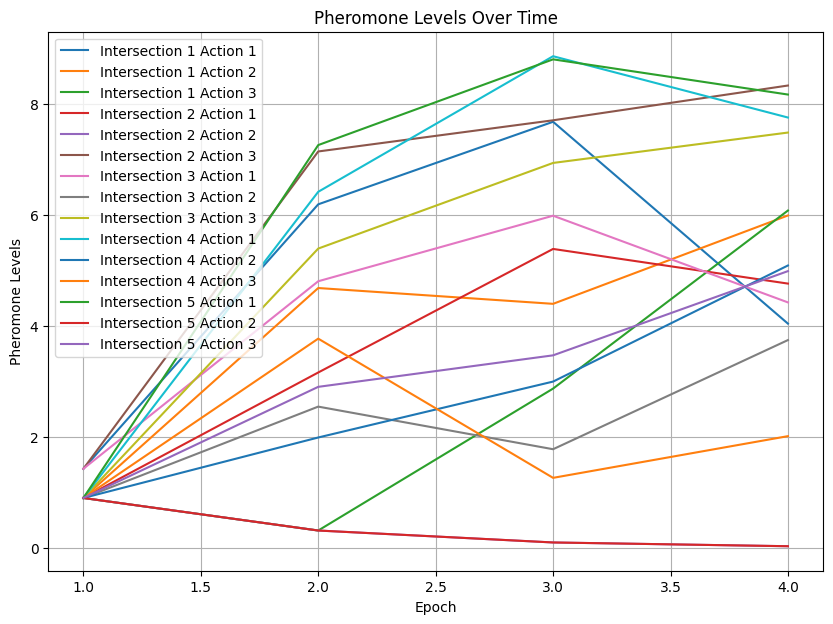

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Updated sample data based on your new values
pheromone_levels = np.array([
    [[1.42631579, 0.9, 0.9], [0.9, 0.9, 1.42631579], [1.42631579, 0.9, 0.9], [0.9, 0.9, 0.9], [0.9, 0.9, 0.9]],  # Assuming missing values are similar to others in epoch
    [[6.19105176, 4.68295919, 0.3138106], [3.16105949, 0.3138106, 7.1434106], [4.80489073, 2.54619253, 5.39383394], [6.41654394, 1.98995267, 3.77103526], [7.25857688, 0.3138106, 2.90246399]],
    [[7.67830289, 4.39816209, 2.87106517], [5.38714225, 0.09847709, 7.70511031], [5.98597869, 1.77857775, 6.93670485], [8.8594308, 2.9973183, 1.26274536], [8.80320897, 0.09847709, 3.47011254]],
    [[4.04146883, 5.99021133, 6.0791448], [4.762824, 0.03090315, 8.33152293], [4.42394584, 3.74501957, 7.48414457], [7.7547333, 5.08901124, 2.0140956], [8.16900109, 0.03090315, 4.98742223]]
])

# Plot settings
epochs = pheromone_levels.shape[0]
intersections = pheromone_levels.shape[1]
actions = pheromone_levels.shape[2]

plt.figure(figsize=(10, 7))  # Set the figure size as needed

for intersection in range(intersections):
    for action in range(actions):
        levels = pheromone_levels[:, intersection, action]
        plt.plot(range(1, epochs+1), levels, label=f'Intersection {intersection+1} Action {action+1}')

plt.xlabel('Epoch')
plt.ylabel('Pheromone Levels')
plt.title('Pheromone Levels Over Time')
plt.legend()
plt.grid(True)
plt.show()


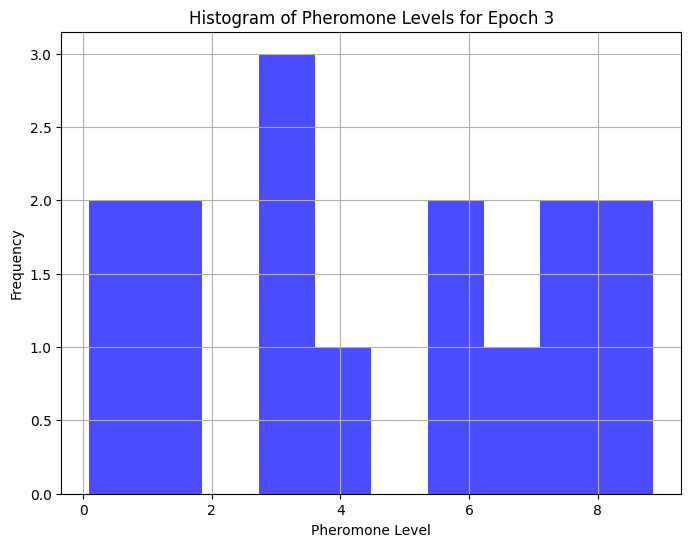

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Using the same pheromone_levels array
pheromone_levels = np.array([
    [[1.42631579, 0.9, 0.9], [0.9, 0.9, 1.42631579], [1.42631579, 0.9, 0.9], [0.9, 0.9, 0.9], [0.9, 0.9, 0.9]],
    [[6.19105176, 4.68295919, 0.3138106], [3.16105949, 0.3138106, 7.1434106], [4.80489073, 2.54619253, 5.39383394], [6.41654394, 1.98995267, 3.77103526], [7.25857688, 0.3138106, 2.90246399]],
    [[7.67830289, 4.39816209, 2.87106517], [5.38714225, 0.09847709, 7.70511031], [5.98597869, 1.77857775, 6.93670485], [8.8594308, 2.9973183, 1.26274536], [8.80320897, 0.09847709, 3.47011254]],
    [[4.04146883, 5.99021133, 6.0791448], [4.762824, 0.03090315, 8.33152293], [4.42394584, 3.74501957, 7.48414457], [7.7547333, 5.08901124, 2.0140956], [8.16900109, 0.03090315, 4.98742223]]
])

# Choose the epoch you want to analyze
epoch = 2  # for example, the third epoch (index 2)
data = pheromone_levels[epoch].flatten()  # Flatten the array to get all pheromone levels in that epoch

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Pheromone Levels for Epoch 3')
plt.xlabel('Pheromone Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Creating a Traci control script so that I can use it in SumoLink in the map of Kamppi

In [ ]:
import traci
import os
import sys

# Setup the path to the SUMO binaries
if 'SUMO_HOME' in os.environ:
    tools = os.path.join(os.environ['SUMO_HOME'], 'tools')
    sys.path.append(tools)
else:
    sys.exit("Please declare the 'SUMO_HOME' environment variable.")

def run_simulation():
    sumoCmd = ["sumo-gui", "-c", "simulation.cfg"]  # Ensure this points to your .sumocfg file
    traci.start(sumoCmd)
    
    # Create your environment and ants
    env = Environment(intersections=5)  # Assume 5 intersections
    ants = [Ant(env) for _ in range(10)]  # Initialize 10 ants
    
    while traci.simulation.getMinExpectedNumber() > 0:
        traci.simulationStep()
        
        # Example of updating traffic lights based on ant decisions
        for ant in ants:
            ant.move()  # Move each ant
            for intersection_id, action in ant.decisions:
                traci.trafficlight.setPhase(str("1007824409"), action)
        
        # Update pheromones after all ants have moved
        update_pheromones(ants, env, 0.1, reward_function)  # Adjust decay_factor and reward_function as necessary

    traci.close()

# Run your simulation
run_simulation()

Result & Analysis

In [1]:
import pandas as pd

# Sample data
data = {
    'Algorithm': ['QACO', 'QACO', 'QACO', 'Q-Learning', 'Q-Learning', 'Q-Learning'],
    'Average Delay': [20, 18, 22, 25, 23, 27],
    'Throughput': [290, 300, 280, 270, 260, 250],
    'Queue Length': [10, 9, 11, 15, 14, 16]
}

df = pd.DataFrame(data)

In [2]:
average_metrics = df.groupby('Algorithm').mean()

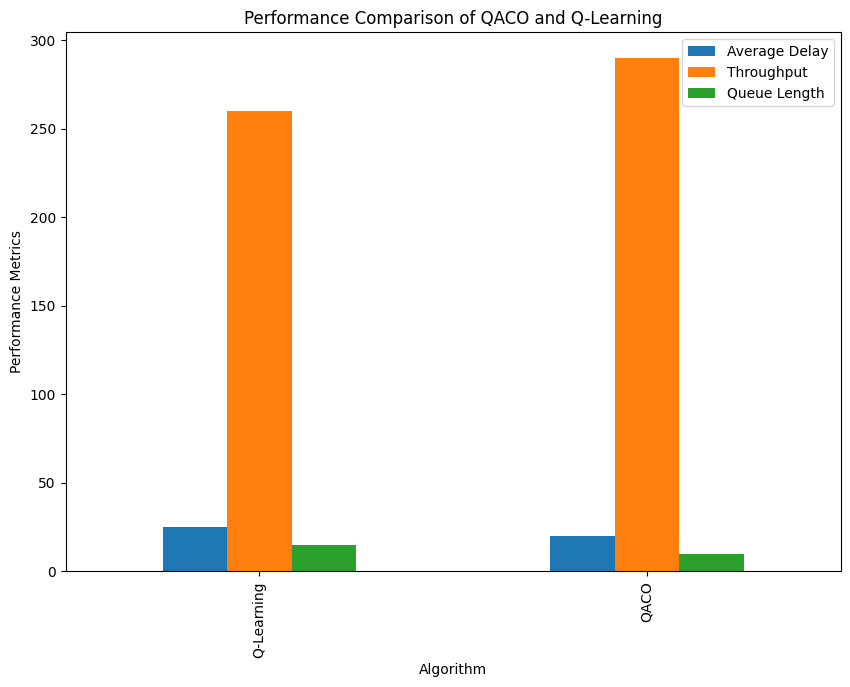

In [3]:
import matplotlib.pyplot as plt

# Plotting
ax = average_metrics.plot(kind='bar', figsize=(10, 7), title="Performance Comparison of QACO and Q-Learning")
ax.set_xlabel("Algorithm")
ax.set_ylabel("Performance Metrics")
plt.show()


In [6]:
data_1 = {
    'Average Delay': [20, 25],
    'Throughput': [295, 260],
    'Queue Length': [10, 15],
    'Computational Time': [2, 5]  # Example: Computational time in seconds
}

index = ['QACO', 'Q-Learning']

# Create a DataFrame
df_1 = pd.DataFrame(data_1, index=index)

In [9]:
# Normalize the data by scaling each value by the maximum in each column
df_1_normalized = df_1 / df_1.max()

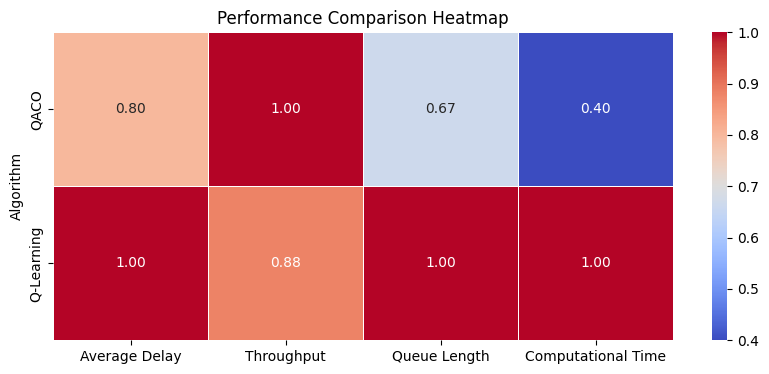

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(df_1_normalized, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Performance Comparison Heatmap')
plt.ylabel('Algorithm')
plt.show()
